<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear</h1>

# <font color='red' style='font-size: 30px;'>Conhecendo o Dataset</font>
<hr style='border: 2px solid red;'>

## Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## O Dataset e o Projeto
<hr>

### Fonte: https://www.kaggle.com/greenwing1985/housepricing

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Nosso objetivo neste exercício é criar um modelo de machine learning, utilizando a técnica de Regressão Linear, que faça previsões sobre os preços de imóveis a partir de um conjunto de características conhecidas dos imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Vamos utilizar um dataset disponível no Kaggle que foi gerado por computador para treinamento de machine learning para iniciantes. Este dataset foi modificado para facilitar o nosso objetivo, que é fixar o conhecimento adquirido no treinamento de Regressão Linear.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Siga os passos propostos nos comentários acima de cada célular e bons estudos.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>precos</b> - Preços do imóveis</li>
    <li><b>area</b> - Área do imóvel</li>
    <li><b>garagem</b> - Número de vagas de garagem</li>
    <li><b>banheiros</b> - Número de banheiros</li>
    <li><b>lareira</b> - Número de lareiras</li>
    <li><b>marmore</b> - Se o imóvel possui acabamento em mármore branco (1) ou não (0)</li>
    <li><b>andares</b> - Se o imóvel possui mais de um andar (1) ou não (0)</li>
</ul>

## Leitura dos dados

Dataset está na pasta "Dados" com o nome "HousePrices_HalfMil.csv" em usa como separador ";".

In [2]:
dados = pd.read_csv('dados/HousePrices_HalfMil.csv', sep = ';')

## Visualizar os dados

In [3]:
dados.head(5)

,precos,area,garagem,banheiros,lareira,marmore,andares
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1


## Verificando o tamanho do dataset

In [4]:
print(f"Tamanho do dataset: {dados.shape[0]}")

Tamanho do dataset: 1000


# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [5]:
dados.describe().round(2)

,precos,area,garagem,banheiros,lareira,marmore,andares
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

### Observe as correlações entre as variáveis:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Quais são mais correlacionadas com a variável dependete (Preço)?</li>
    <li>Qual o relacionamento entre elas (positivo ou negativo)?</li>
    <li>Existe correlação forte entre as variáveis explicativas?</li>
</ul>

In [6]:
dados.corr().round(4)

,precos,area,garagem,banheiros,lareira,marmore,andares
precos,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garagem,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banheiros,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
lareira,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmore,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
andares,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


As variáveis com uma correlação mais forte com o preço são 'marmore' e 'andares'.

Ambas apresentam uma relação positiva com o 'preço'.

Ambas apresentam uma correlação muito fraca entre si.

# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

# Análises gráficas

<img width='700px' src='../Dados/img/Box-Plot.png'>

## Importando biblioteca seaborn

In [7]:
import seaborn as sns

## Configure o estilo e cor dos gráficos (opcional)

In [8]:
sns.set_palette("Blues_r")
sns.set_style("whitegrid")

## Box plot da variável *dependente* (y)


### Avalie o comportamento da distribuição da variável dependente:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>Parecem existir valores discrepantes (outliers)?</li>
    <li>O box plot apresenta alguma tendência?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot

<AxesSubplot:title={'center':'Preços de Imóveis'}, ylabel='Reais'>

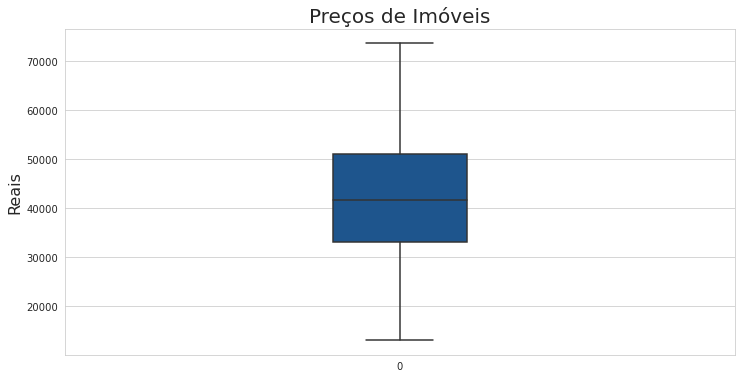

In [9]:
ax = sns.boxplot(data = dados.precos, orient = 'v', width = 0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title("Preços de Imóveis", fontsize = 20)
ax.set_ylabel("Reais", fontsize = 16)
ax

O boxplot da variável dependente (preço) não apresenta outliers, e parece ter uma tendência central.

## Investigando a variável *dependente* (y) juntamente com outras característica

Faça um box plot da variável dependente em conjunto com cada variável explicativa (somente as categóricas).

### Avalie o comportamento da distribuição da variável dependente com cada variável explicativa categórica:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>As estatísticas apresentam mudança significativa entre as categorias?</li>
    <li>O box plot apresenta alguma tendência bem definida?</li>
</ul>

### Box-plot (Preço X Garagem)

<AxesSubplot:title={'center':'Preços de Imóveis'}, xlabel='Número de Vagas', ylabel='Reais'>

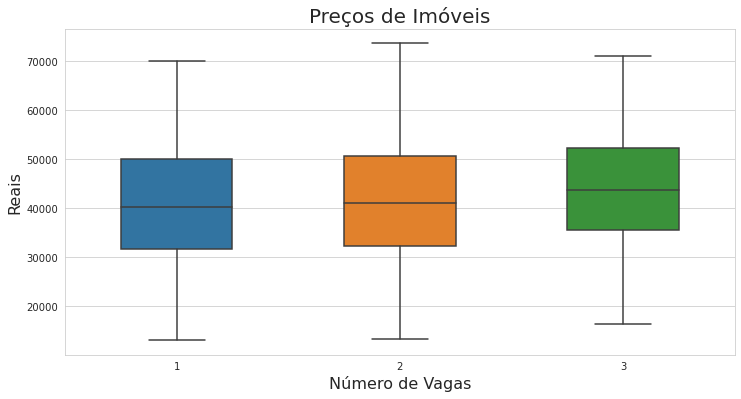

In [10]:
sns.set_palette("tab10")
ax = sns.boxplot(y = 'precos', x = 'garagem', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Preços de Imóveis", fontsize = 20)
ax.set_ylabel("Reais", fontsize = 16)
ax.set_xlabel("Número de Vagas", fontsize = 16)
ax

### Box-plot (Preço X Banheiros)

<AxesSubplot:title={'center':'Preços de Imóveis'}, xlabel='Número de Banheiros', ylabel='Reais'>

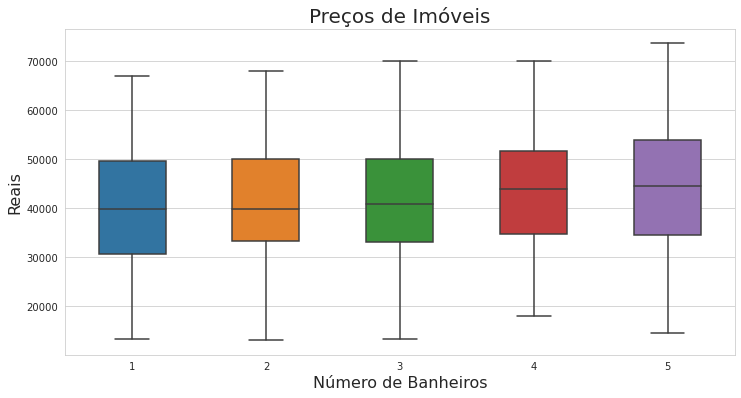

In [11]:
ax = sns.boxplot(y = 'precos', x = 'banheiros', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Preços de Imóveis", fontsize = 20)
ax.set_ylabel("Reais", fontsize = 16)
ax.set_xlabel("Número de Banheiros", fontsize = 16)
ax

### Box-plot (Preço X Lareira)

<AxesSubplot:title={'center':'Preços de Imóveis'}, xlabel='Número de Lareiras', ylabel='Reais'>

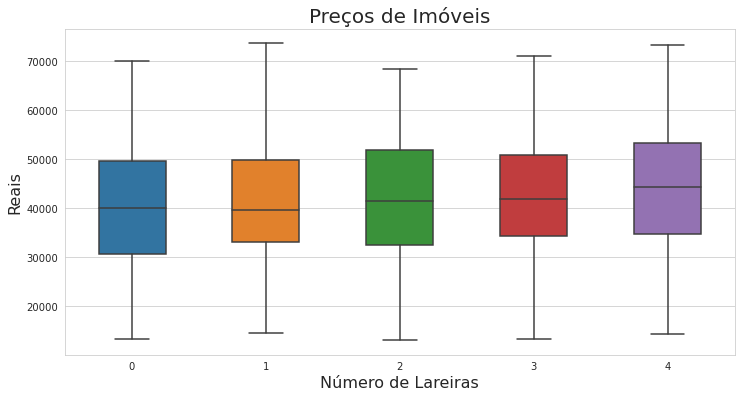

In [12]:
ax = sns.boxplot(y = 'precos', x = 'lareira', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Preços de Imóveis", fontsize = 20)
ax.set_ylabel("Reais", fontsize = 16)
ax.set_xlabel("Número de Lareiras", fontsize = 16)
ax

### Box-plot (Preço X Acabamento em Mármore)

<AxesSubplot:title={'center':'Preços de Imóveis'}, xlabel='Acabamento em Mármore', ylabel='Reais'>

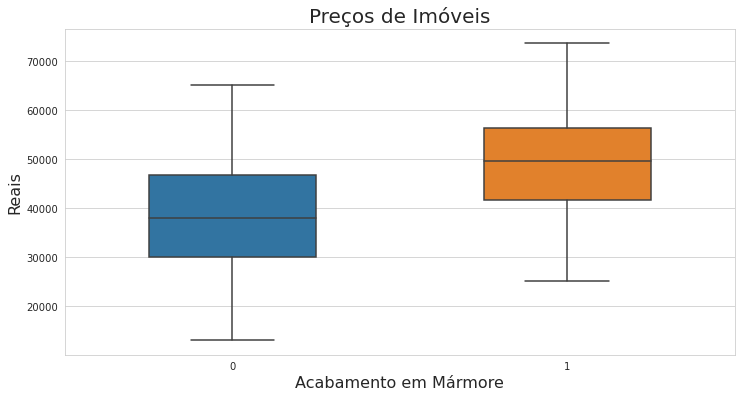

In [13]:
ax = sns.boxplot(y = 'precos', x = 'marmore', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Preços de Imóveis", fontsize = 20)
ax.set_ylabel("Reais", fontsize = 16)
ax.set_xlabel("Acabamento em Mármore", fontsize = 16)
ax

### Box-plot (Preço X Andares)

<AxesSubplot:title={'center':'Preços de Imóveis'}, xlabel='Mais de um Andar', ylabel='Reais'>

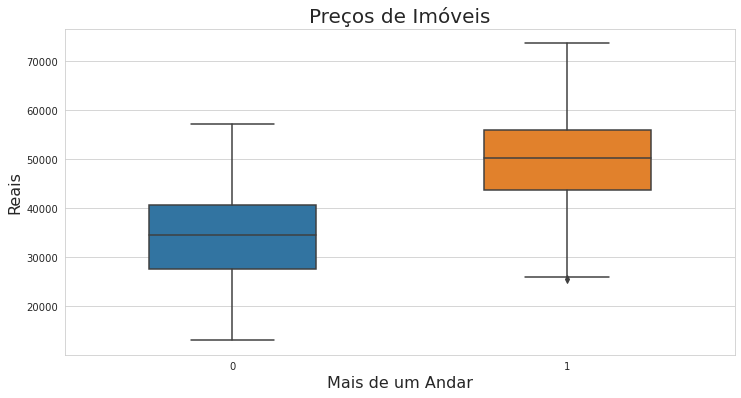

In [14]:
ax = sns.boxplot(y = 'precos', x = 'andares', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title("Preços de Imóveis", fontsize = 20)
ax.set_ylabel("Reais", fontsize = 16)
ax.set_xlabel("Mais de um Andar", fontsize = 16)
ax

## Distribuição de frequências da variável *dependente* (y)

Construa um histograma da variável dependente (Preço).

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>A distribuição de frequências da variável dependente parece ser assimétrica?</li>
    <li>É possível supor que a variável dependente segue uma distribuição normal?</li>
</ul>

https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Distribuição de Frequência'}, xlabel='precos', ylabel='Preços dos Imóveis (Reais)'>

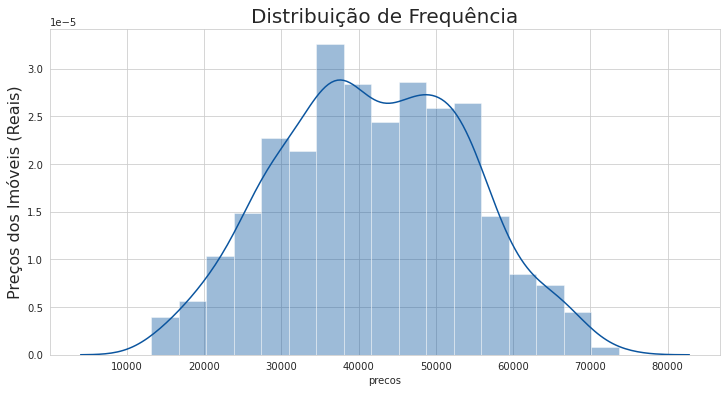

In [15]:
sns.set_palette("Blues_r")
ax = sns.distplot(dados.precos)
ax.figure.set_size_inches(12, 6)
ax.set_title("Distribuição de Frequência", fontsize = 20)
ax.set_ylabel("Preços dos Imóveis (Reais)", fontsize = 16)
ax

Observando o Gráfico de Frequência é possível ver que a variável 'preços' aproxima-se de uma distribuição normal.

## Gráficos de dispersão entre as variáveis do dataset

## Plotando o pairplot fixando somente uma variável no eixo y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Plote gráficos de dispersão da variável dependente contra cada variável explicativa. Utilize o pairplot da biblioteca seaborn para isso.

Plote o mesmo gráfico utilizando o parâmetro kind='reg'.

### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>É possível identificar alguma relação linear entre as variáveis?</li>
    <li>A relação é positiva ou negativa?</li>
    <li>Compare com os resultados obtidos na matriz de correlação.</li>
</ul>

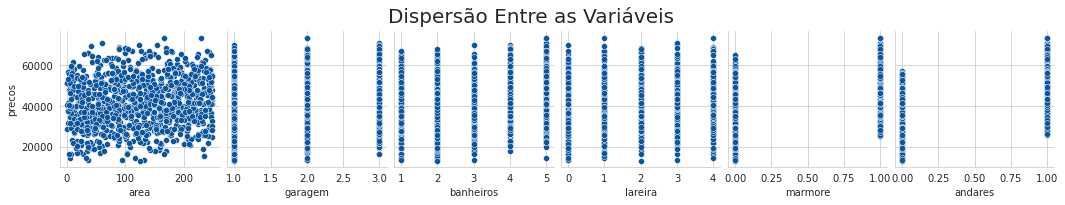

In [16]:
ax = sns.pairplot(dados, y_vars = 'precos', x_vars = ['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'])
ax.fig.suptitle("Dispersão Entre as Variáveis", fontsize = 20, y = 1.1)
ax

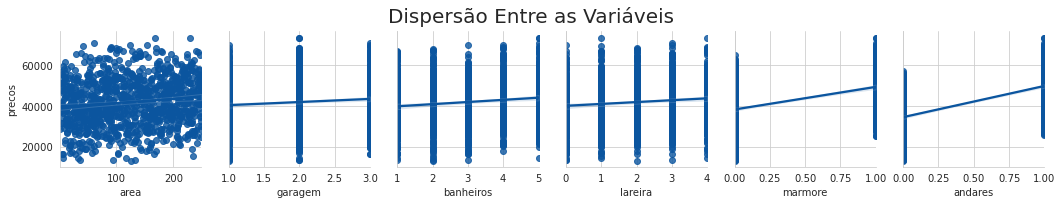

In [17]:
ax = sns.pairplot(dados, y_vars = 'precos', x_vars = ['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares'], kind = 'reg')
ax.fig.suptitle("Dispersão Entre as Variáveis", fontsize = 20, y = 1.1)
ax

Observado o Gráfico de Dispersão com a linha de regressão ele confirma o observado na Tabela de Correlação.

As variáveis com uma relação mais forte com o 'preço' são 'marmore' e 'andares', ambas apresentando uma relação positiva.

# <font color='red' style='font-size: 30px;'>Estimando um Modelo de Regressão Linear</font>
<hr style='border: 2px solid red;'>

## Importando o *train_test_split* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [18]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar a variável dependente (y)

In [19]:
y = dados.precos

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [20]:
X = dados[['area', 'garagem', 'banheiros', 'lareira', 'marmore', 'andares']]

## Criando os datasets de treino e de teste

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2811)

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Instanciando a classe *LinearRegression()*

In [23]:
modelo = LinearRegression()

## Utilizando o método *fit()* para estimar o modelo linear utilizando os dados de TREINO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [24]:
modelo.fit(X_train, y_train)

LinearRegression()

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


### Avalie:
<ul style='font-size: 16px; line-height: 2; text-align: justify;'>
    <li>O modelo apresenta um bom ajuste?</li>
    <li>Você lembra o que representa o R²?</li>
    <li>Qual medida podemos tomar para melhorar essa estatística?</li>
</ul>

In [25]:
print(f"R² = {modelo.score(X_train, y_train).round(2)}")

R² = 0.64


O R² representa o quanto da variação da variável dependente pode ser explicada com as variáveis exlicativas.

O R² de 0.64 não é muito bom, isso provavelmente ocorre por falta de informação, já que no dados somente duas variáveis tem uma relação mais forte com a variável dependente.

Adicionar mais variáveis, principalmente que tenham uma relação forte com a variável dependente vai gerar um ajuste melhor.

## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [26]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [27]:
print(f"R² = {metrics.r2_score(y_test, y_previsto).round(2)}")

R² = 0.67


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Criando um simulador simples

Crie um simulador que gere estimativas de preço a partir de um conjunto de informações de um imóvel.

In [28]:
area = 40
garagem = 2
banheiros = 4
lareira = 4
marmore = 1
andares = 0
entrada = [[area, garagem, banheiros, lareira, marmore, andares]]
print(f"R$ {modelo.predict(entrada)[0]:.2f}")

R$ 42709.10


# <font color='red' style='font-size: 30px;'>Métricas de Regressão</font>
<hr style='border: 2px solid red;'>

## Métricas da regressão
<hr>

fonte: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algumas estatísticas obtidas do modelo de regressão são muito úteis como critério de comparação entre modelos estimados e de seleção do melhor modelo, as principais métricas de regressão que o scikit-learn disponibiliza para modelos lineares são as seguintes:

### Erro Quadrático Médio

Média dos quadrados dos erros. Ajustes melhores apresentam $EQM$ mais baixo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

### Raíz do Erro Quadrático Médio

Raíz quadrada da média dos quadrados dos erros. Ajustes melhores apresentam $\sqrt{EQM}$ mais baixo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

## Obtendo métricas para o modelo com Temperatura Máxima

# <font color='red' style='font-size: 30px;'>Salvando e Carregando o Modelo Estimado</font>
<hr style='border: 2px solid red;'>

## Importando a biblioteca pickle

## Salvando o modelo estimado

### Em um novo notebook/projeto Python

<h4 style='color: blue; font-weight: normal'>In [1]:</h4>

```sh
import pickle

modelo = open('modelo_preço','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garagem = 2
banheiros = 4
lareira = 4
marmore = 0
andares = 1

entrada = [[area, garagem, banheiros, lareira, marmore, andares]]

print('$ {0:.2f}'.format(lm_new.predict(entrada)[0]))
```

<h4 style='color: red; font-weight: normal'>Out [1]:</h4>

```
$ 46389.80
```